<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Libraries</a></span></li><li><span><a href="#Confidence-Interval-Description" data-toc-modified-id="Confidence-Interval-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Confidence Interval Description</a></span></li><li><span><a href="#Excel-Files" data-toc-modified-id="Excel-Files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Excel Files</a></span></li><li><span><a href="#Question-3.17" data-toc-modified-id="Question-3.17-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question 3.17</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#pooled-variance" data-toc-modified-id="pooled-variance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>pooled variance</a></span></li><li><span><a href="#Standard-Error" data-toc-modified-id="Standard-Error-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Standard Error</a></span></li><li><span><a href="#t-score" data-toc-modified-id="t-score-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>t-score</a></span></li><li><span><a href="#Margin-of-Error" data-toc-modified-id="Margin-of-Error-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Margin of Error</a></span></li><li><span><a href="#Confidence-Interval" data-toc-modified-id="Confidence-Interval-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Confidence Interval</a></span></li><li><span><a href="#Highlighting-Same-sign-confidence-interval" data-toc-modified-id="Highlighting-Same-sign-confidence-interval-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Highlighting Same sign confidence interval</a></span></li><li><span><a href="#Multi-indexing-columns" data-toc-modified-id="Multi-indexing-columns-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Multi-indexing columns</a></span></li></ul></div>

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy

# pandas display settings
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 50)

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# ipython display
from IPython.display import Image

# data dir
snap_dir = '../data/snapshots/'
data_dir = '../data/excel/'

# Confidence Interval Description

> If the confidence interval for the difference is strictly positive, then the first shop is outperforming the second.

> If the confidence interval for the difference is strictly negative, then the second shop is outperforming the first.

> If the confidence interval for the difference is from negative to positive ( e.g. (-0.5, 0.5) ), then we are not sure if one shop outperforms the other, so we cannot make a statement based on confidence intervals.

# Excel Files

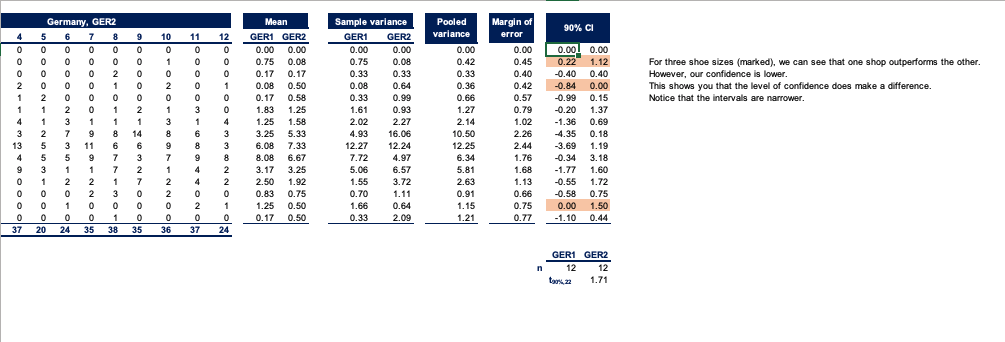

In [2]:
Image(filename=snap_dir + 'lec73_sol2.png',width=3000,height=3000)

# Question 3.17

# Load the data

In [3]:
df = pd.read_excel(data_dir + '3.17.Practical-example.Confidence-intervals-exercise.xlsx',
                  sheet_name = 'Task 3',
                  skiprows = 11,
                  skipfooter= 32-28+1, 
                  index_col = 0,
                  usecols = "B:N,P:AA")

# prints
print(df.shape)

# rename columns
df.columns = list(range(24))
df

(15, 24)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
US,,,,,,,,,,,,,,,,,,,,,,,,
4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.5,1,1,1,0,1,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
5.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,2,0,1
6.0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,3,1,2,0,0,0,0,0,0,0
6.5,3,3,1,2,1,0,2,0,2,1,3,4,2,0,2,1,1,2,0,1,2,1,3,0
7.0,0,3,3,4,1,0,1,0,2,0,0,1,0,0,0,4,1,3,1,1,1,3,1,4
7.5,1,2,4,1,2,6,4,3,5,8,2,1,2,1,1,3,2,7,9,8,14,8,6,3
8.0,6,10,3,9,1,3,6,8,3,12,3,9,13,6,5,13,5,3,11,6,6,9,8,3


In [4]:
# add mean column
df['xbar'] = df.iloc[:,0:12].mean(axis=1)
df['ybar'] = df.iloc[:,12:24].mean(axis=1)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,xbar,ybar
US,,,,,,,,,,,,,,,,,,,,,,,,,,
4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000
4.5,1,1,1,0,1,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.750000,0.083333
5.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0.166667,0.166667
5.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,2,0,1,0.083333,0.500000
6.0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,3,1,2,0,0,0,0,0,0,0,0.166667,0.583333
6.5,3,3,1,2,1,0,2,0,2,1,3,4,2,0,2,1,1,2,0,1,2,1,3,0,1.833333,1.250000
7.0,0,3,3,4,1,0,1,0,2,0,0,1,0,0,0,4,1,3,1,1,1,3,1,4,1.250000,1.583333
7.5,1,2,4,1,2,6,4,3,5,8,2,1,2,1,1,3,2,7,9,8,14,8,6,3,3.250000,5.333333
8.0,6,10,3,9,1,3,6,8,3,12,3,9,13,6,5,13,5,3,11,6,6,9,8,3,6.083333,7.333333


In [5]:
# sample variances
df['sx2'] = df.iloc[:,0:12].var(axis=1)
df['sy2'] = df.iloc[:,12:24].var(axis=1)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,xbar,ybar,sx2,sy2
US,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4.5,1,1,1,0,1,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.750000,0.083333,0.750000,0.083333
5.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0.166667,0.166667,0.333333,0.333333
5.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,2,0,1,0.083333,0.500000,0.083333,0.636364
6.0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,3,1,2,0,0,0,0,0,0,0,0.166667,0.583333,0.333333,0.992424
6.5,3,3,1,2,1,0,2,0,2,1,3,4,2,0,2,1,1,2,0,1,2,1,3,0,1.833333,1.250000,1.606061,0.931818
7.0,0,3,3,4,1,0,1,0,2,0,0,1,0,0,0,4,1,3,1,1,1,3,1,4,1.250000,1.583333,2.022727,2.265152
7.5,1,2,4,1,2,6,4,3,5,8,2,1,2,1,1,3,2,7,9,8,14,8,6,3,3.250000,5.333333,4.931818,16.060606
8.0,6,10,3,9,1,3,6,8,3,12,3,9,13,6,5,13,5,3,11,6,6,9,8,3,6.083333,7.333333,12.265152,12.242424


# pooled variance

General formula:
$$
s_{ \text { pooled } } = \sqrt { \frac { \left( n _ { 1 } - 1 \right) s _ { 1 } ^ { 2 } + \left( n _ { 2 } - 1 \right) s _ { 2 } ^ { 2 } + \ldots + \left( n _ { k } - 1 \right) s _ { k } ^ { 2 } } { n _ { 1 } + n _ { 2 } + \ldots + n _ { k } - k } }
$$

For equal sample sizes:
$$
s_{ \text { pooled } } = \sqrt { \frac { s _ { 1 } ^ { 2 } + s _ { 2 } ^ { 2 } + \ldots + s _ { k } ^ { 2 } } { k } }
$$

In [6]:
# pooled sample variance
df['sp2'] = (df['sx2'] + df['sy2'])/2.0
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,xbar,ybar,sx2,sy2,sp2
US,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
4.5,1,1,1,0,1,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.750000,0.083333,0.750000,0.083333,0.416667
5.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0.166667,0.166667,0.333333,0.333333,0.333333
5.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,2,0,1,0.083333,0.500000,0.083333,0.636364,0.359848
6.0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,3,1,2,0,0,0,0,0,0,0,0.166667,0.583333,0.333333,0.992424,0.662879
6.5,3,3,1,2,1,0,2,0,2,1,3,4,2,0,2,1,1,2,0,1,2,1,3,0,1.833333,1.250000,1.606061,0.931818,1.268939
7.0,0,3,3,4,1,0,1,0,2,0,0,1,0,0,0,4,1,3,1,1,1,3,1,4,1.250000,1.583333,2.022727,2.265152,2.143939
7.5,1,2,4,1,2,6,4,3,5,8,2,1,2,1,1,3,2,7,9,8,14,8,6,3,3.250000,5.333333,4.931818,16.060606,10.496212
8.0,6,10,3,9,1,3,6,8,3,12,3,9,13,6,5,13,5,3,11,6,6,9,8,3,6.083333,7.333333,12.265152,12.242424,12.253788


# Standard Error

In [7]:
# std_err = sp/n1 + sp/n2
nx = 12
ny = 12
df['std_err'] =  df['sp2']/nx + df['sp2']/ny
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,xbar,ybar,sx2,sy2,sp2,std_err
US,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4.5,1,1,1,0,1,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.750000,0.083333,0.750000,0.083333,0.416667,0.069444
5.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0.166667,0.166667,0.333333,0.333333,0.333333,0.055556
5.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,2,0,1,0.083333,0.500000,0.083333,0.636364,0.359848,0.059975
6.0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,3,1,2,0,0,0,0,0,0,0,0.166667,0.583333,0.333333,0.992424,0.662879,0.110480


# t-score

In [8]:
import scipy
import scipy.stats

q = 1 - (1 - 0.90)/2
deg_fr = 12 + 12 -2
t_score = scipy.stats.t.ppf(q,deg_fr)
t_score # critical value

1.717144374380242

# Margin of Error

In [9]:
df['margin_err'] = t_score * np.sqrt(df['std_err'].values)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,xbar,ybar,sx2,sy2,sp2,std_err,margin_err
US,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4.5,1,1,1,0,1,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.750000,0.083333,0.750000,0.083333,0.416667,0.069444,0.452507
5.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0.166667,0.166667,0.333333,0.333333,0.333333,0.055556,0.404735
5.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,2,0,1,0.083333,0.500000,0.083333,0.636364,0.359848,0.059975,0.420524
6.0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,3,1,2,0,0,0,0,0,0,0,0.166667,0.583333,0.333333,0.992424,0.662879,0.110480,0.570753
6.5,3,3,1,2,1,0,2,0,2,1,3,4,2,0,2,1,1,2,0,1,2,1,3,0,1.833333,1.250000,1.606061,0.931818,1.268939,0.211490,0.789681
7.0,0,3,3,4,1,0,1,0,2,0,0,1,0,0,0,4,1,3,1,1,1,3,1,4,1.250000,1.583333,2.022727,2.265152,2.143939,0.357323,1.026449
7.5,1,2,4,1,2,6,4,3,5,8,2,1,2,1,1,3,2,7,9,8,14,8,6,3,3.250000,5.333333,4.931818,16.060606,10.496212,1.749369,2.271159
8.0,6,10,3,9,1,3,6,8,3,12,3,9,13,6,5,13,5,3,11,6,6,9,8,3,6.083333,7.333333,12.265152,12.242424,12.253788,2.042298,2.453954


# Confidence Interval

In [10]:
df['ci_low'] = (df['xbar'] - df['ybar'] - df['margin_err']).round(2)
df['ci_high'] = (df['xbar'] - df['ybar'] + df['margin_err']).round(2)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,xbar,ybar,sx2,sy2,sp2,std_err,margin_err,ci_low,ci_high
US,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
4.5,1,1,1,0,1,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.750000,0.083333,0.750000,0.083333,0.416667,0.069444,0.452507,0.21,1.12
5.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0.166667,0.166667,0.333333,0.333333,0.333333,0.055556,0.404735,-0.40,0.40
5.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,2,0,1,0.083333,0.500000,0.083333,0.636364,0.359848,0.059975,0.420524,-0.84,0.00
6.0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,3,1,2,0,0,0,0,0,0,0,0.166667,0.583333,0.333333,0.992424,0.662879,0.110480,0.570753,-0.99,0.15
6.5,3,3,1,2,1,0,2,0,2,1,3,4,2,0,2,1,1,2,0,1,2,1,3,0,1.833333,1.250000,1.606061,0.931818,1.268939,0.211490,0.789681,-0.21,1.37
7.0,0,3,3,4,1,0,1,0,2,0,0,1,0,0,0,4,1,3,1,1,1,3,1,4,1.250000,1.583333,2.022727,2.265152,2.143939,0.357323,1.026449,-1.36,0.69
7.5,1,2,4,1,2,6,4,3,5,8,2,1,2,1,1,3,2,7,9,8,14,8,6,3,3.250000,5.333333,4.931818,16.060606,10.496212,1.749369,2.271159,-4.35,0.19
8.0,6,10,3,9,1,3,6,8,3,12,3,9,13,6,5,13,5,3,11,6,6,9,8,3,6.083333,7.333333,12.265152,12.242424,12.253788,2.042298,2.453954,-3.70,1.20


# Highlighting Same sign confidence interval

In [11]:
df2 = df[['xbar','ybar','sx2','sy2','sp2','margin_err','ci_low','ci_high']]
df2

,xbar,ybar,sx2,sy2,sp2,margin_err,ci_low,ci_high
US,,,,,,,,
4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
4.5,0.750000,0.083333,0.750000,0.083333,0.416667,0.452507,0.21,1.12
5.0,0.166667,0.166667,0.333333,0.333333,0.333333,0.404735,-0.40,0.40
5.5,0.083333,0.500000,0.083333,0.636364,0.359848,0.420524,-0.84,0.00
6.0,0.166667,0.583333,0.333333,0.992424,0.662879,0.570753,-0.99,0.15
6.5,1.833333,1.250000,1.606061,0.931818,1.268939,0.789681,-0.21,1.37
7.0,1.250000,1.583333,2.022727,2.265152,2.143939,1.026449,-1.36,0.69
7.5,3.250000,5.333333,4.931818,16.060606,10.496212,2.271159,-4.35,0.19
8.0,6.083333,7.333333,12.265152,12.242424,12.253788,2.453954,-3.70,1.20


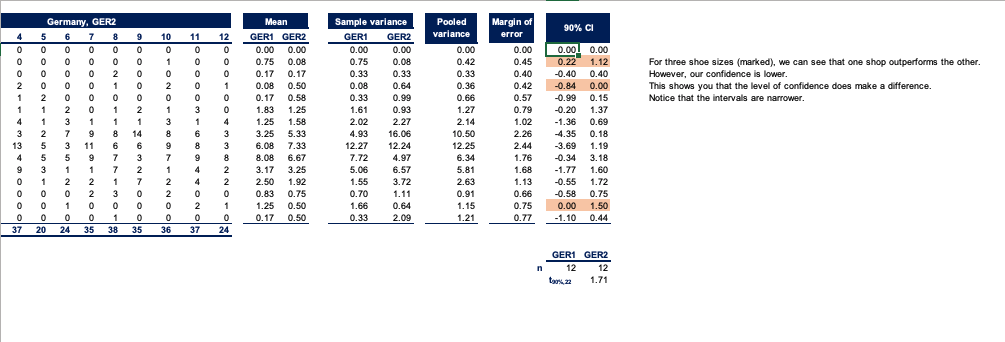

In [12]:
Image(filename=snap_dir + 'lec73_sol2.png',width=3000,height=3000)

In [13]:
def highlight_cells(x):
    c1 = 'background-color: orange'
    c2 = '' 
    df1 = pd.DataFrame(c2, index=x.index, columns=x.columns)


    m1 = np.sign(x['ci_high']) == np.sign(x['ci_low'])
    m2 = x['ci_low'] == 0.0
    m3 = x['ci_high'] == 0.0
    m4 = x['ci_low'] != x['ci_high']
    m = (m1 | m2 | m3) & m4
    df1.loc[m, ['ci_low','ci_high']] = c1
    
    return df1

df2.style.apply(highlight_cells, axis=None)

,xbar,ybar,sx2,sy2,sp2,margin_err,ci_low,ci_high
US,,,,,,,,
4.0,0,0,0,0,0,0,0,0
4.5,0.75,0.0833333,0.75,0.0833333,0.416667,0.452507,0.21,1.12
5.0,0.166667,0.166667,0.333333,0.333333,0.333333,0.404735,-0.4,0.4
5.5,0.0833333,0.5,0.0833333,0.636364,0.359848,0.420524,-0.84,0
6.0,0.166667,0.583333,0.333333,0.992424,0.662879,0.570753,-0.99,0.15
6.5,1.83333,1.25,1.60606,0.931818,1.26894,0.789681,-0.21,1.37
7.0,1.25,1.58333,2.02273,2.26515,2.14394,1.02645,-1.36,0.69
7.5,3.25,5.33333,4.93182,16.0606,10.4962,2.27116,-4.35,0.19
8.0,6.08333,7.33333,12.2652,12.2424,12.2538,2.45395,-3.7,1.2


In [14]:
# Explanation:
# for size 4.5, both values are +ve, this means first shop outperforms second.
# for size 5.5, both values are -ve, this means second shop outperforms first.
# for size 10.5, both values are -ve, this means second shop outperforms first.

# for other cased, confidence level lies between -ve and postive values, any
# shop can do better than other.

# Multi-indexing columns

In [15]:
mi = pd.MultiIndex.from_tuples([('Mean', 'x'), ('Mean', 'y'), ('Sample Variance', 'x'), ('Sample Variance', 'y'),('Pooled Variance',''), ('Margin of Err',''),('95% CI','low'),('95% CI','high')])
df2.columns = mi
df2

Mean           Sample Variance            Pooled Variance  \
             x         y               x          y                   
US                                                                    
4.0   0.000000  0.000000        0.000000   0.000000        0.000000   
4.5   0.750000  0.083333        0.750000   0.083333        0.416667   
5.0   0.166667  0.166667        0.333333   0.333333        0.333333   
5.5   0.083333  0.500000        0.083333   0.636364        0.359848   
6.0   0.166667  0.583333        0.333333   0.992424        0.662879   
6.5   1.833333  1.250000        1.606061   0.931818        1.268939   
7.0   1.250000  1.583333        2.022727   2.265152        2.143939   
7.5   3.250000  5.333333        4.931818  16.060606       10.496212   
8.0   6.083333  7.333333       12.265152  12.242424       12.253788   
8.5   8.083333  6.666667        7.719697   4.969697        6.344697   
9.0   3.166667  3.250000        5.060606   6.568182        5.814394   
9.5   2.500000  1.916667        1.545455   3.719697        2.632576   
10.0  0.833333  0.750000        0.696970   1.113636        0.905303   
10.5  1.250000  0.500000        1.659091   0.636364        1.147727   
11.5  0.166667  0.500000        0.333333   2.090909        1.212121   

     Margin of Err 95% CI        
                      low  high  
US                               
4.0       0.000000   0.00  0.00  
4.5       0.452507   0.21  1.12  
5.0       0.404735  -0.40  0.40  
5.5       0.420524  -0.84  0.00  
6.0       0.570753  -0.99  0.15  
6.5       0.789681  -0.21  1.37  
7.0       1.026449  -1.36  0.69  
7.5       2.271159  -4.35  0.19  
8.0       2.453954  -3.70  1.20  
8.5       1.765780  -0.35  3.18  
9.0       1.690376  -1.77  1.61  
9.5       1.137422  -0.55  1.72  
10.0      0.667004  -0.58  0.75  
10.5      0.751018  -0.00  1.50  
11.5      0.771799  -1.11  0.44

In [16]:
df2['95% CI','low']

US
4.0     0.00
4.5     0.21
5.0    -0.40
5.5    -0.84
6.0    -0.99
6.5    -0.21
7.0    -1.36
7.5    -4.35
8.0    -3.70
8.5    -0.35
9.0    -1.77
9.5    -0.55
10.0   -0.58
10.5   -0.00
11.5   -1.11
Name: (95% CI, low), dtype: float64

In [17]:
df2['95% CI','high']

US
4.0     0.00
4.5     1.12
5.0     0.40
5.5     0.00
6.0     0.15
6.5     1.37
7.0     0.69
7.5     0.19
8.0     1.20
8.5     3.18
9.0     1.61
9.5     1.72
10.0    0.75
10.5    1.50
11.5    0.44
Name: (95% CI, high), dtype: float64

In [18]:
def highlight_cells(x):
    c1 = 'background-color: orange'
    c2 = '' 
    df1 = pd.DataFrame(c2, index=x.index, columns=x.columns)


    m1 = np.sign(x['95% CI','high']) == np.sign(x['95% CI','low'])
    m2 = x['95% CI','low'] == 0.0
    m3 = x['95% CI','high'] == 0.0
    m4 = x['95% CI','low'] != x['95% CI','high']
    m = (m1 | m2 | m3) & m4
    
    df1.loc[m, ['95% CI']] = c1
    
    return df1

df2.style.apply(highlight_cells, axis=None)